In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = [4, 3]

In [16]:
df = pd.read_csv('3_taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

    journey_id – уникальный id поездки
    user_id – id пользователя
    driver_id – id водителя
    taxi_id – id машины
    icon – тип поездки
    start_type – тип заказа (asap, reserved, delayed)
    start_at – время начала поездки
    start_lat – исходное местоположение пользователя, широта
    start_lon – исходное местоположение пользователя, долгота
    end_at – время окончания поездки
    end_lat – итоговое местоположение, широта
    end_lon – итоговое местоположение, долгота
    end_state – состояние заказа
    driver_start_lat – исходное местоположение водителя, широта
    driver_start_lon – исходное местоположение водителя, долгота
    arrived_at – время прибытия водителя
    source – платформа, с которой сделан заказ
    driver_score – оценка водителя клиентом
    rider_score – оценка клиента водителем

In [20]:
df.head(1)

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0




Изучаем с каких платформ вызывают такси, и каковы их соотношения

In [29]:
orders_by_platform = df \
    .groupby('source') \
    .journey_id \
    .count() \
    .reset_index() \
    .rename(columns={'journey_id': 'total_orders'})

In [30]:
orders_by_platform

,source,total_orders
0,Android,4909
1,Wap,136
2,iPad,571
3,iPhone,9741
4,web,7631


In [55]:
orders_by_platform['share'] = orders_by_platform.total_orders / orders_by_platform.total_orders.sum() * 100
orders_by_platform['share'] = orders_by_platform['share'].round()

In [61]:
orders_by_platform.sort_values('share', ascending=False)

,source,total_orders,share
3,iPhone,9741,42.0
4,web,7631,33.0
0,Android,4909,21.0
2,iPad,571,2.0
1,Wap,136,1.0


<Axes: xlabel='source', ylabel='total_orders'>

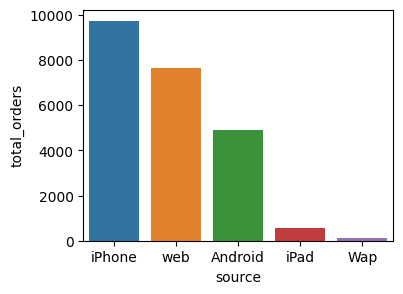

In [82]:
sns.barplot(orders_by_platform.sort_values('total_orders', ascending=False), \
            x='source', \
            y='total_orders')

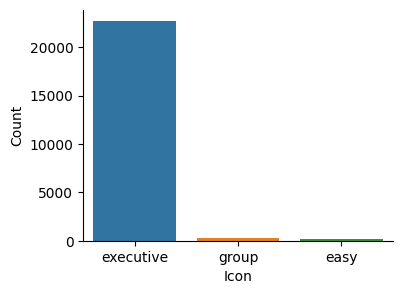

In [99]:
a = sns.countplot(x='icon', data=df)  # строим и записываем в переменную
a.set(xlabel='Icon', ylabel='Count')  # подписываем оси
sns.despine()  # убрать часть рамки графика
plt.show()

<Axes: xlabel='source', ylabel='count'>

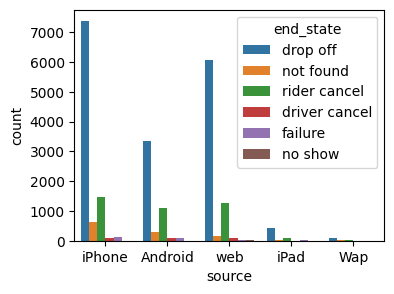

In [120]:
sns.countplot(x='source', hue='end_state', data=df)

In [121]:
df.driver_score.value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

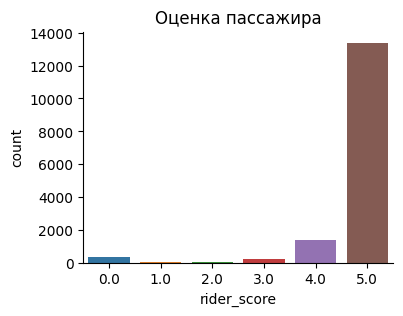

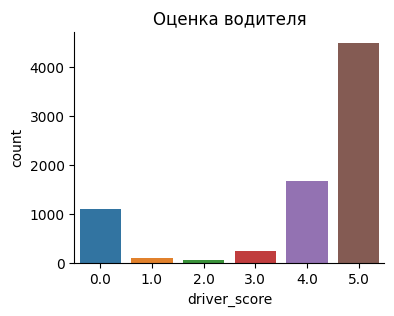

In [201]:
rs = sns.countplot(x=df.rider_score, data=df)
plt.title('Оценка пассажира')
sns.despine()   # убирает ненужные рамки графика
plt.show()
sns.countplot(x=df.driver_score, data=df)
plt.title('Оценка водителя')
sns.despine()   # убирает ненужные рамки графика
plt.show()

In [145]:
df \
    .driver_score \
    .value_counts()

5.0    4499
4.0    1674
0.0    1094
3.0     227
1.0      94
2.0      62
Name: driver_score, dtype: int64

In [164]:
driver_score_dist = df \
    .groupby('driver_score') \
    .agg({'journey_id': 'count'}) \
    .rename(columns={'journey_id': 'total_scores'})

In [204]:
driver_score_dist['driver_score_share'] = driver_score_dist.total_scores / driver_score_dist.total_scores.sum()

driver_score_counts = driver_score_dist['driver_score_share'] \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'driver_score_share': 'percentage'}) \
    .sort_values(['driver_score'])

In [175]:
driver_score_counts

,driver_score,percentage
0,0.0,14.30
1,1.0,1.23
2,2.0,0.81
3,3.0,2.97
4,4.0,21.88
5,5.0,58.81


In [203]:
# более легкий способ сделать тоже самое, что сверху
# благодаря параметру normalize, который сам высчитывает доли

df.driver_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'driver_score', 'driver_score': 'percentage'}) \
    .sort_values('driver_score')

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


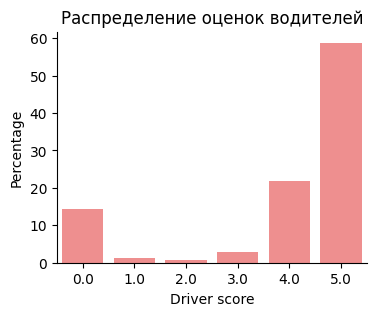

In [230]:
ds = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='red', alpha=0.5)
ds.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.title('Распределение оценок водителей')
plt.show()

Проделаем тоже самое для оценок пассажиров.

In [222]:
rider_score_counts = df.rider_score \
    .value_counts(normalize=True) \
    .mul(100) \
    .round(2) \
    .reset_index() \
    .rename(columns={'index': 'rider_score', 'rider_score': 'percentage'}) \
    .sort_values('rider_score')

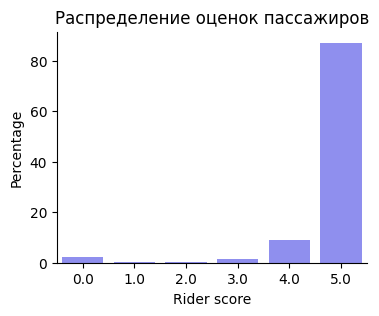

In [229]:
rs = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
rs.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()
plt.title('Распределение оценок пассажиров')
plt.show()